# Capstone Project - Predicting House Prices in KING COUNTY

# 1. Import Libraries and load dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Load the PROCESSED HOUSE Dataset
house_feature_df  = pd.read_csv("house_feature_df.csv")

In [3]:
#house_feature_df.dtypes

In [4]:
Hot_encoding  = pd.get_dummies(house_feature_df['sight'])
Hot_encoding.columns = ['sight 0','sight 1','sight 2','sight 3','sight 4']
house_feature_df['sight 0'] = Hot_encoding['sight 0'].astype(np.int64)
house_feature_df['sight 1'] = Hot_encoding['sight 1'].astype(np.int64)
house_feature_df['sight 2'] = Hot_encoding['sight 2'].astype(np.int64)
house_feature_df['sight 3'] = Hot_encoding['sight 3'].astype(np.int64)
house_feature_df['sight 4'] = Hot_encoding['sight 4'].astype(np.int64)
house_feature_df = house_feature_df.drop(['sight'], axis=1)

In [5]:
Hot_encoding  = pd.get_dummies(house_feature_df['condition'])
Hot_encoding.columns = ['condition 1','condition 2','condition 3','condition 4','condition 5']
house_feature_df['condition 1'] = Hot_encoding['condition 1'].astype(np.int64)
house_feature_df['condition 2'] = Hot_encoding['condition 2'].astype(np.int64)
house_feature_df['condition 3'] = Hot_encoding['condition 3'].astype(np.int64)
house_feature_df['condition 4'] = Hot_encoding['condition 4'].astype(np.int64)
house_feature_df['condition 5'] = Hot_encoding['condition 5'].astype(np.int64)
house_feature_df = house_feature_df.drop(['condition'], axis=1)

In [6]:
Hot_encoding  = pd.get_dummies(house_feature_df['quality'])
Hot_encoding.columns = ['quality 1','quality 3','quality 4','quality 5','quality 6','quality 7','quality 8','quality 9','quality 10','quality 11','quality 12','quality 13']
house_feature_df['quality 1'] = Hot_encoding['quality 1'].astype(np.int64)
house_feature_df['quality 3'] = Hot_encoding['quality 3'].astype(np.int64)
house_feature_df['quality 4'] = Hot_encoding['quality 4'].astype(np.int64)
house_feature_df['quality 5'] = Hot_encoding['quality 5'].astype(np.int64)
house_feature_df['quality 6'] = Hot_encoding['quality 6'].astype(np.int64)
house_feature_df['quality 7'] = Hot_encoding['quality 7'].astype(np.int64)
house_feature_df['quality 8'] = Hot_encoding['quality 8'].astype(np.int64)
house_feature_df['quality 9'] = Hot_encoding['quality 9'].astype(np.int64)
house_feature_df['quality 10'] = Hot_encoding['quality 10'].astype(np.int64)
house_feature_df['quality 11'] = Hot_encoding['quality 11'].astype(np.int64)
house_feature_df['quality 12'] = Hot_encoding['quality 12'].astype(np.int64)
house_feature_df['quality 13'] = Hot_encoding['quality 13'].astype(np.int64)
house_feature_df = house_feature_df.drop(['quality'], axis=1)

In [7]:
house_feature_df.head(2)

,yr_built,yr_renovated,house_age,age_after_renovtion,room_bed,room_bath,living_measure,lot_measure,ceil,coast,...,quality 4,quality 5,quality 6,quality 7,quality 8,quality 9,quality 10,quality 11,quality 12,quality 13
0,1956,0,58,0,4,3.25,3020,13457,1.0,0,...,0,0,0,0,0,1,0,0,0,0
1,1976,0,38,0,4,2.50,2550,7500,1.0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
house_feature_df = house_feature_df.drop(['yr_built'], axis=1)
house_feature_df = house_feature_df.drop(['yr_renovated'], axis=1)

In [9]:
# change the sequence of the columns
house_feature_df = house_feature_df[['house_age', 'age_after_renovtion', 'Premium_House','room_bed', 'room_bath', 'living_measure', 
                                     'lot_measure', 'ceil','coast', 'ceil_measure','basement','zipcode', 'lat', 'long','furnished',  
                                     'sight 0','sight 1','sight 2','sight 3','sight 4',
                                     'condition 1','condition 2','condition 3','condition 4','condition 5',
                                     'quality 1','quality 3','quality 4','quality 5', 'quality 6','quality 7','quality 8',
                                     'quality 9','quality 10', 'quality 11','quality 12','quality 13','price']]

In [10]:
house_feature_df_bkup = house_feature_df
#house_feature_df = house_feature_df_bkup                      

In [11]:
#house_feature_df.dtypes

In [12]:
house_feature_df_Zscore = house_feature_df[['house_age', 'age_after_renovtion', 'Premium_House','room_bed', 'room_bath', 
                                            'living_measure','lot_measure', 'ceil','ceil_measure','basement']]

In [13]:
house_feature_df_Zscore.dtypes

house_age                int64
age_after_renovtion      int64
Premium_House            int64
room_bed                 int64
room_bath              float64
living_measure           int64
lot_measure              int64
ceil                   float64
ceil_measure             int64
basement                 int64
dtype: object

In [14]:
from scipy.stats import zscore

house_feature_df_Zscore = house_feature_df_Zscore.apply(zscore)

In [15]:
house_feature_df_Zscore['coast'] = house_feature_df['coast']
house_feature_df_Zscore['furnished'] = house_feature_df['furnished']
house_feature_df_Zscore['sight 0'] = house_feature_df['sight 0']
house_feature_df_Zscore['sight 1'] = house_feature_df['sight 1']
house_feature_df_Zscore['sight 2'] = house_feature_df['sight 2']
house_feature_df_Zscore['sight 3'] = house_feature_df['sight 3']
house_feature_df_Zscore['sight 4'] = house_feature_df['sight 4']
house_feature_df_Zscore['condition 1'] = house_feature_df['condition 1']
house_feature_df_Zscore['condition 2'] = house_feature_df['condition 2']
house_feature_df_Zscore['condition 3'] = house_feature_df['condition 3']
house_feature_df_Zscore['condition 4'] = house_feature_df['condition 4']
house_feature_df_Zscore['condition 5'] = house_feature_df['condition 5']
house_feature_df_Zscore['quality 1'] = house_feature_df['quality 1']
house_feature_df_Zscore['quality 3'] = house_feature_df['quality 3']
house_feature_df_Zscore['quality 4'] = house_feature_df['quality 4']
house_feature_df_Zscore['quality 5'] = house_feature_df['quality 5']
house_feature_df_Zscore['quality 6'] = house_feature_df['quality 6']
house_feature_df_Zscore['quality 7'] = house_feature_df['quality 7']
house_feature_df_Zscore['quality 8'] = house_feature_df['quality 8']
house_feature_df_Zscore['quality 9'] = house_feature_df['quality 9']
house_feature_df_Zscore['quality 10'] = house_feature_df['quality 10']
house_feature_df_Zscore['quality 11'] = house_feature_df['quality 11']
house_feature_df_Zscore['quality 12'] = house_feature_df['quality 12']
house_feature_df_Zscore['quality 13'] = house_feature_df['quality 13']
house_feature_df_Zscore['price'] = house_feature_df['price']


In [16]:
house_feature_df_Zscore.head(3)  

,house_age,age_after_renovtion,Premium_House,room_bed,room_bath,living_measure,lot_measure,ceil,ceil_measure,basement,...,quality 5,quality 6,quality 7,quality 8,quality 9,quality 10,quality 11,quality 12,quality 13,price
0,0.502823,-0.159448,-0.238423,0.676324,1.471176,1.019769,-0.040412,-0.918246,1.482544,-0.658905,...,0,0,0,0,1,0,0,0,0,808100
1,-0.177759,-0.159448,-0.238423,0.676324,0.497017,0.508413,-0.183824,-0.918246,-0.049409,1.147895,...,0,0,0,1,0,0,0,0,0,277500
2,-1.164604,-0.159448,-0.238423,-0.399890,0.497017,0.312575,-0.260285,0.932318,0.698474,-0.658905,...,0,0,0,1,0,0,0,0,0,404000



# Split the data into training and test set in the ratio of 70:30 (Training:Test)

In [17]:
data,label =house_feature_df_Zscore.iloc[:,:-1],house_feature_df_Zscore.iloc[:,-1]
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.3, random_state=123)

In [18]:
train_data.shape

(15005, 34)

In [19]:
test_data.shape

(6431, 34)

In [20]:
house_feature_df_Zscore = house_feature_df_Zscore.drop(['price'], axis=1)

## Apply multiple regression models to extract the Important features

In [21]:
Model     = []
RMSE      = [] 
RSqu      = []

def show_features(db,coeff,Prediction,actual,heading):
    
    Coefficients         = pd.DataFrame(coeff)
    Coefficients.columns = ['Coefficients']
    Features = pd.DataFrame(list(db.iloc[:,:-1]))
    Features.columns = ['Features']
    Features = pd.concat([Features,Coefficients,],axis=1) 
    print(Features)
    print()
    print("Root Mean squared error : %.2f" % np.sqrt(mean_squared_error(actual, Prediction))) # The mean squared error
    print('R-Square                : %.2f' % r2_score(actual, Prediction)) # Range between 0 & 1. 0 : not a good fit. 1: good fit

    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=Features["Features"],y= Features["Coefficients"],palette="prism",linewidth=1,edgecolor="Black",ax=ax)
    sns.set_context('talk') 
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='blue')
    header = "Feature Importance by " + heading
    plt.title(header,fontsize = 14,weight = 'bold')
    plt.xlabel('Features', fontsize = 15, weight = 'bold')
    plt.xticks(rotation=90)
    plt.ylabel('Coefficients', fontsize = 15, weight = 'bold')
    plt.grid(False)
    plt.show()
    
    rmse = np.sqrt(mean_squared_error(actual, Prediction))
    rsqu = r2_score(actual, Prediction)
                
    Model.append(heading)
    RMSE.append(rmse)
    RSqu.append(rsqu)
    
    return

In [22]:
Model_     = []
RMSE_      = []
RSqu_      = []

def Get_Metrics(Prediction,actual,heading):

    rmse_ = np.sqrt(mean_squared_error(actual, Prediction))
    rsqu_ = r2_score(actual, Prediction)
                
    Model_.append(heading)
    RMSE_.append(rmse_)
    RSqu_.append(rsqu_)
    
    print(heading)
    print("RMSE      : %.2f" % np.sqrt(mean_squared_error(actual, Prediction))) # The mean squared error
    print('R-Squared : %.2f' % r2_score(actual, Prediction))  
    return


### Linear Regression

               Features  Coefficients
0             house_age  8.015607e+04
1   age_after_renovtion -4.269882e+03
2         Premium_House  1.417743e+05
3              room_bed -1.760486e+04
4             room_bath  2.907728e+04
5        living_measure  5.149429e+04
6           lot_measure -4.024696e+03
7                  ceil  1.780226e+04
8          ceil_measure  4.220215e+04
9              basement  2.787849e+04
10                coast  4.381291e+05
11            furnished  5.983874e+05
12              sight 0 -4.652820e+04
13              sight 1  3.037768e+04
14              sight 2 -1.218449e+04
15              sight 3 -1.698199e+04
16              sight 4  4.531699e+04
17          condition 1 -6.705013e+04
18          condition 2 -1.877403e+04
19          condition 3  1.243056e+04
20          condition 4  2.219967e+04
21          condition 5  5.119393e+04
22            quality 1 -1.970983e+04
23            quality 3 -1.764756e+05
24            quality 4 -1.930189e+05
25          

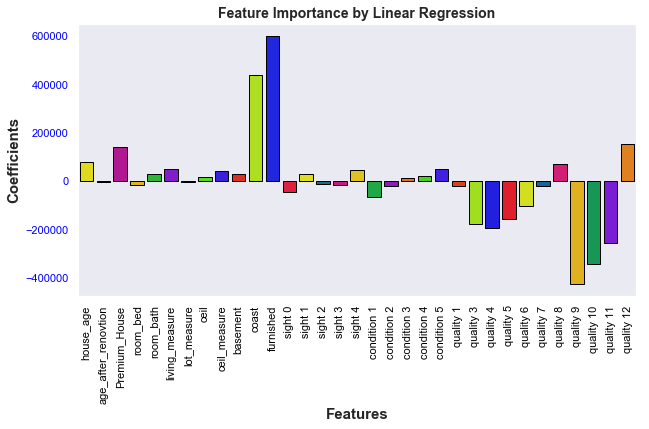

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

heading = "Linear Regression"
lr      = LinearRegression()
lr.fit(train_data,train_label)
PredLr  = lr.predict(test_data)
show_features(house_feature_df_Zscore,lr.coef_,pd.DataFrame(PredLr),test_label,heading)

### Ada Boost Regressor (an ensemble method)

               Features  Coefficients
0             house_age      0.015648
1   age_after_renovtion      0.009690
2         Premium_House      0.233482
3              room_bed      0.013985
4             room_bath      0.024918
5        living_measure      0.429585
6           lot_measure      0.067544
7                  ceil      0.001776
8          ceil_measure      0.065722
9              basement      0.012082
10                coast      0.032857
11            furnished      0.003075
12              sight 0      0.005144
13              sight 1      0.003255
14              sight 2      0.006082
15              sight 3      0.001014
16              sight 4      0.006106
17          condition 1      0.000000
18          condition 2      0.000000
19          condition 3      0.001980
20          condition 4      0.000882
21          condition 5      0.000000
22            quality 1      0.000000
23            quality 3      0.000000
24            quality 4      0.000000
25          

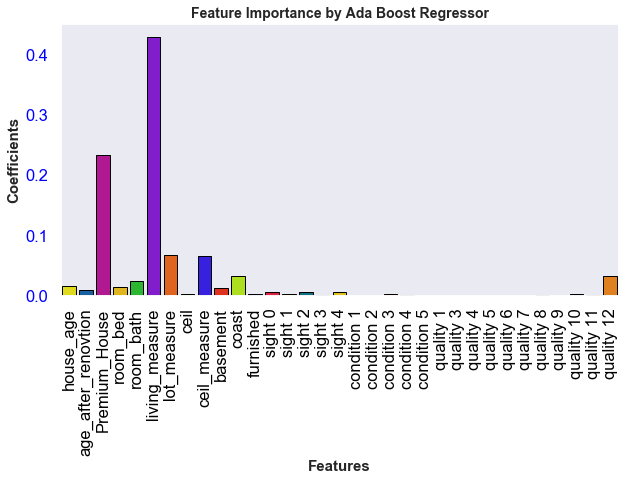

In [24]:
from sklearn.ensemble import AdaBoostRegressor

heading = "Ada Boost Regressor"
adb     = AdaBoostRegressor()
adb.fit(train_data,train_label)
Predadb = adb.predict(test_data)

show_features(house_feature_df_Zscore,adb.feature_importances_,pd.DataFrame(Predadb),test_label,heading)

### Decision Tree Regressor

               Features  Coefficients
0             house_age  5.863288e-02
1   age_after_renovtion  2.436354e-03
2         Premium_House  5.250984e-01
3              room_bed  9.238473e-03
4             room_bath  1.384815e-02
5        living_measure  1.502532e-01
6           lot_measure  6.038357e-02
7                  ceil  5.877325e-03
8          ceil_measure  2.844525e-02
9              basement  9.639262e-03
10                coast  1.446198e-02
11            furnished  7.983074e-02
12              sight 0  2.614627e-03
13              sight 1  1.332552e-03
14              sight 2  7.526389e-04
15              sight 3  1.149020e-03
16              sight 4  2.267332e-03
17          condition 1  1.035556e-04
18          condition 2  1.801553e-04
19          condition 3  3.843935e-03
20          condition 4  2.372279e-03
21          condition 5  1.682147e-03
22            quality 1  0.000000e+00
23            quality 3  0.000000e+00
24            quality 4  5.863001e-13
25          

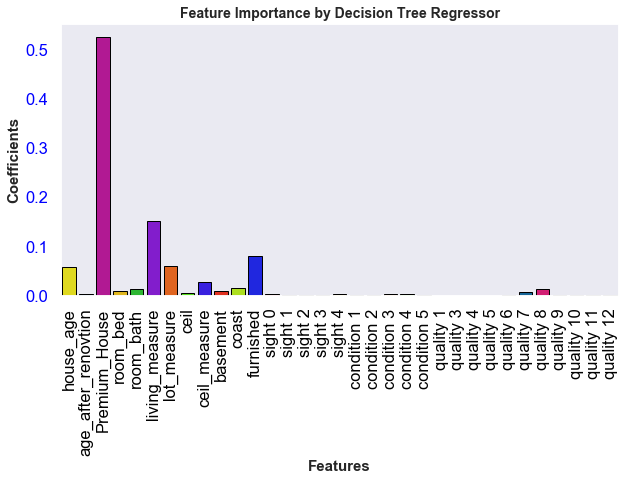

In [25]:
from sklearn.tree import DecisionTreeRegressor

heading = "Decision Tree Regressor"

dtr = DecisionTreeRegressor()
dtr.fit(train_data,train_label)
Preddtr = dtr.predict(test_data)

show_features(house_feature_df_Zscore,dtr.feature_importances_,pd.DataFrame(Preddtr),test_label,heading)

### Random Forest Regressor

               Features  Coefficients
0             house_age  5.728158e-02
1   age_after_renovtion  4.195645e-03
2         Premium_House  5.297530e-01
3              room_bed  8.989751e-03
4             room_bath  1.531654e-02
5        living_measure  1.557705e-01
6           lot_measure  5.423419e-02
7                  ceil  5.289136e-03
8          ceil_measure  3.176269e-02
9              basement  1.381505e-02
10                coast  1.196257e-02
11            furnished  6.288345e-02
12              sight 0  3.592506e-03
13              sight 1  1.503545e-03
14              sight 2  1.159938e-03
15              sight 3  1.167000e-03
16              sight 4  1.949684e-03
17          condition 1  7.424040e-05
18          condition 2  2.455739e-04
19          condition 3  2.870861e-03
20          condition 4  2.632585e-03
21          condition 5  2.048173e-03
22            quality 1  6.925215e-08
23            quality 3  1.317021e-06
24            quality 4  1.432068e-05
25          

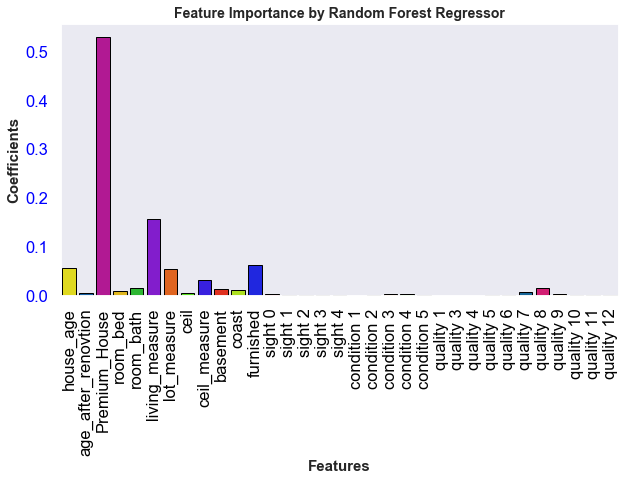

In [26]:
from sklearn.ensemble import RandomForestRegressor

heading = "Random Forest Regressor"

rf = RandomForestRegressor()
rf.fit(train_data,train_label)
Predrf = rf.predict(test_data)

show_features(house_feature_df_Zscore,rf.feature_importances_,pd.DataFrame(Predrf),test_label,heading)

### SVM Regressor

               Features  Coefficients
0             house_age    100.147735
1   age_after_renovtion    495.578010
2         Premium_House   3643.634595
3              room_bed   3364.245854
4             room_bath   5414.375891
5        living_measure   6955.400841
6           lot_measure   1064.407500
7                  ceil   3126.528020
8          ceil_measure   5907.093778
9              basement   3378.400541
10                coast     97.000000
11            furnished   2461.000000
12              sight 0   -982.000000
13              sight 1    147.000000
14              sight 2    399.000000
15              sight 3    238.000000
16              sight 4    198.000000
17          condition 1    -14.000000
18          condition 2    -64.000000
19          condition 3    -95.000000
20          condition 4    -61.000000
21          condition 5    234.000000
22            quality 1     -1.000000
23            quality 3     -2.000000
24            quality 4    -16.000000
25          

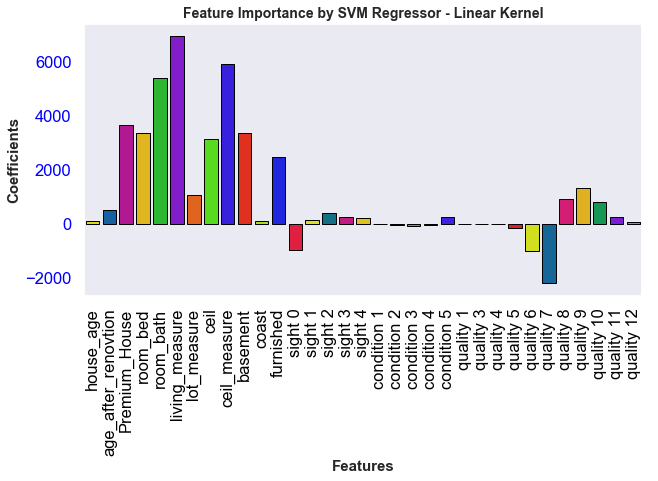

In [27]:
from sklearn.svm import SVR

heading = "SVM Regressor - Linear Kernel"

svm = SVR(kernel='linear')
svm.fit(train_data,train_label)
Predsvm = svm.predict(test_data)

Coefficients        = pd.DataFrame(svm.coef_)
Temp = pd.melt(Coefficients)
Coefficients = Temp["value"]

show_features(house_feature_df_Zscore,Coefficients,pd.DataFrame(Predsvm),test_label,heading)

### GradientBoostingRegressor

               Features  Coefficients
0             house_age      0.033714
1   age_after_renovtion      0.004101
2         Premium_House      0.600825
3              room_bed      0.000510
4             room_bath      0.008847
5        living_measure      0.193110
6           lot_measure      0.022814
7                  ceil      0.000531
8          ceil_measure      0.009459
9              basement      0.004184
10                coast      0.019038
11            furnished      0.059074
12              sight 0      0.006516
13              sight 1      0.000010
14              sight 2      0.000105
15              sight 3      0.000000
16              sight 4      0.002189
17          condition 1      0.000000
18          condition 2      0.000084
19          condition 3      0.001148
20          condition 4      0.000058
21          condition 5      0.001019
22            quality 1      0.000000
23            quality 3      0.000000
24            quality 4      0.000121
25          

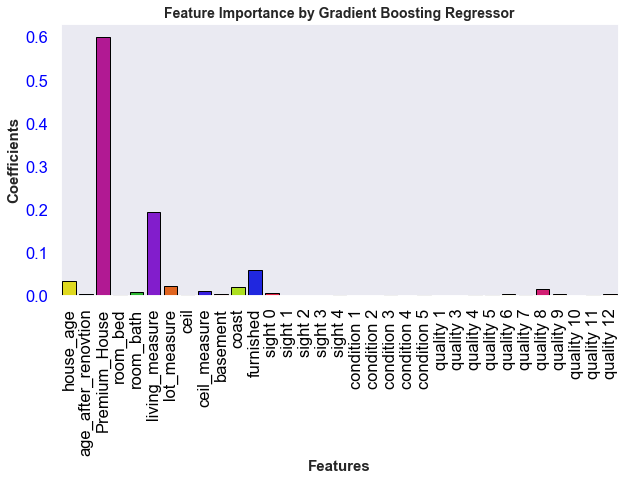

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

heading = "Gradient Boosting Regressor"

gbr = GradientBoostingRegressor()
gbr.fit(train_data,train_label)
Predgbr = gbr.predict(test_data)

show_features(house_feature_df_Zscore,gbr.feature_importances_,pd.DataFrame(Predgbr),test_label,heading)

In [29]:
pd.DataFrame({'Model': Model,
              'RMSE': RMSE,
              'R Squared': RSqu})

,Model,RMSE,R Squared
0,Linear Regression,168036.240557,0.763081
1,Ada Boost Regressor,215371.693043,0.610801
2,Decision Tree Regressor,224615.160785,0.576677
3,Random Forest Regressor,169895.629103,0.757809
4,SVM Regressor - Linear Kernel,337919.357715,0.041879
5,Gradient Boosting Regressor,161261.313210,0.781800


### Hence feature extraction with Standardized data has NO IMPACT. 
#### Now extract features and build the models with regular data 

## Re-build the training and test set in the ratio of 70:30 (Training:Test)

In [30]:
del(train_data)
del(test_data)
del(train_label)          
del(test_label)  

In [31]:
Model     = []
RMSE      = [] 
RSqu      = []

In [32]:
data,label =house_feature_df.iloc[:,:-1],house_feature_df.iloc[:,-1]
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.3, random_state=123)

### Decision Tree Regressor

               Features  Coefficients
0             house_age  1.253365e-02
1   age_after_renovtion  1.419888e-03
2         Premium_House  5.250959e-01
3              room_bed  2.395899e-03
4             room_bath  7.389386e-03
5        living_measure  1.382142e-01
6           lot_measure  3.030384e-02
7                  ceil  2.269274e-03
8                 coast  1.274199e-02
9          ceil_measure  1.721584e-02
10             basement  3.552736e-03
11              zipcode  6.858555e-03
12                  lat  1.018493e-01
13                 long  3.566700e-02
14            furnished  7.984018e-02
15              sight 0  2.508740e-03
16              sight 1  3.837402e-04
17              sight 2  5.150468e-04
18              sight 3  6.608796e-04
19              sight 4  4.662391e-04
20          condition 1  1.740299e-04
21          condition 2  1.961271e-04
22          condition 3  8.909152e-04
23          condition 4  1.155121e-03
24          condition 5  9.103378e-04
25          

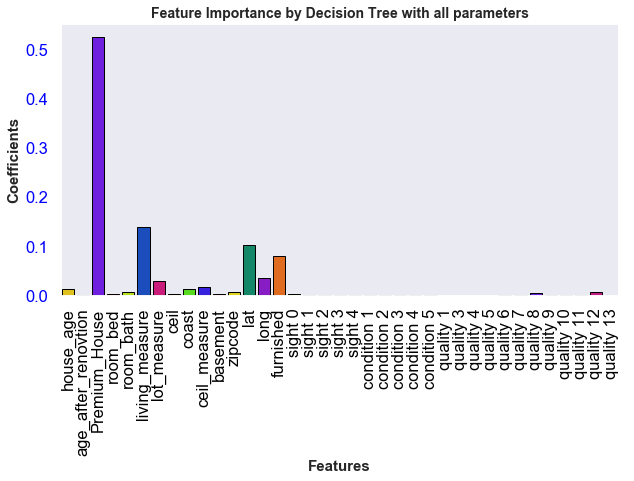

In [33]:
from sklearn.tree import DecisionTreeRegressor

heading = "Decision Tree with all parameters"

dtr = DecisionTreeRegressor()
dtr.fit(train_data,train_label)
Preddtr = dtr.predict(test_data)

show_features(house_feature_df,dtr.feature_importances_,pd.DataFrame(Preddtr),test_label,heading)

In [34]:
Decision_Tree_feature_df = house_feature_df

### Build the model by droping non-important features

In [35]:
Decision_Tree_feature_df = Decision_Tree_feature_df.drop(['sight 1' ,'sight 2','sight 3','sight 4','condition 1','condition 2',
                                                          'condition 3','condition 4','quality 1','quality 3','quality 4',
                                                          'quality 5','quality 6','quality 7','quality 9',
                                                         'quality 10','quality 11','quality 13'], axis=1)

In [36]:
data_DT,label_DT =Decision_Tree_feature_df.iloc[:,:-1],Decision_Tree_feature_df.iloc[:,-1]
train_data_DT, test_data_DT, train_label_DT, test_label_DT = train_test_split(data_DT, label_DT, test_size=0.3, random_state=123)

               Features  Coefficients
0             house_age      0.010568
1   age_after_renovtion      0.001639
2         Premium_House      0.525096
3              room_bed      0.002331
4             room_bath      0.007841
5        living_measure      0.139484
6           lot_measure      0.031140
7                  ceil      0.002152
8                 coast      0.013043
9          ceil_measure      0.017911
10             basement      0.003693
11              zipcode      0.007271
12                  lat      0.104193
13                 long      0.036362
14            furnished      0.079829
15              sight 0      0.002563
16          condition 5      0.003428
17            quality 8      0.004569
18           quality 12      0.006886

Root Mean squared error : 156057.82
R-Square                : 0.80


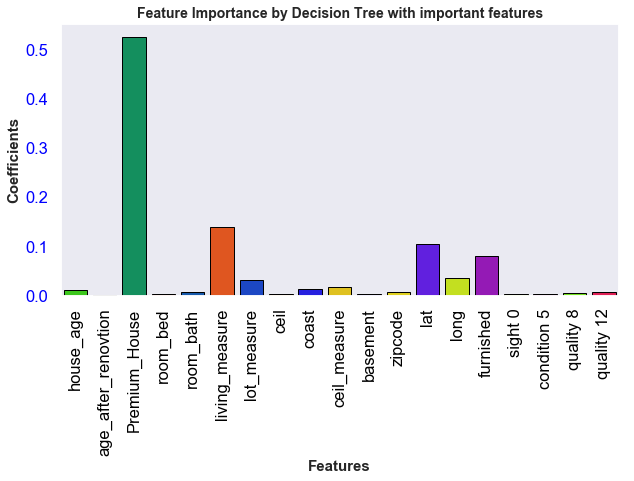

In [37]:
from sklearn.tree import DecisionTreeRegressor

heading = "Decision Tree with important features"

dtr = DecisionTreeRegressor()
dtr.fit(train_data_DT,train_label_DT)
Preddtr = dtr.predict(test_data_DT)

show_features(Decision_Tree_feature_df,dtr.feature_importances_,pd.DataFrame(Preddtr),test_label_DT,heading)

### Decision Tree Regressor - Hyper Parameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],    
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

# Instantiate the grid search model
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_cv_dtr.fit(train_data_DT,train_label_DT)

print(grid_cv_dtr.best_estimator_) 

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [39]:
heading = 'Decision Tree - After Parameter Tuning'

Preddtr_Tune  = grid_cv_dtr.predict(test_data_DT) 
Get_Metrics(pd.DataFrame(Preddtr_Tune),test_label_DT,heading)

Decision Tree - After Parameter Tuning
RMSE      : 145357.47
R-Squared : 0.82


### Random Forest Regressor

               Features  Coefficients
0             house_age  1.227898e-02
1   age_after_renovtion  5.510274e-03
2         Premium_House  5.209628e-01
3              room_bed  2.536532e-03
4             room_bath  6.003937e-03
5        living_measure  1.794516e-01
6           lot_measure  1.624615e-02
7                  ceil  1.488822e-03
8                 coast  1.434342e-02
9          ceil_measure  1.301009e-02
10             basement  5.615413e-03
11              zipcode  8.524090e-03
12                  lat  1.024282e-01
13                 long  4.093638e-02
14            furnished  5.145479e-02
15              sight 0  3.197238e-03
16              sight 1  3.164179e-04
17              sight 2  6.092120e-04
18              sight 3  5.938870e-04
19              sight 4  1.507904e-03
20          condition 1  1.429821e-04
21          condition 2  1.747621e-04
22          condition 3  1.011497e-03
23          condition 4  6.486177e-04
24          condition 5  1.285553e-03
25          

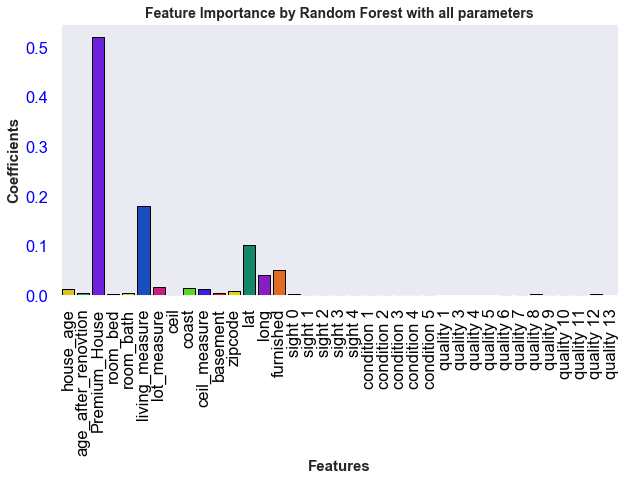

In [40]:
from sklearn.ensemble import RandomForestRegressor

heading = "Random Forest with all parameters"

rf = RandomForestRegressor()
rf.fit(train_data,train_label)
Predrf = rf.predict(test_data)

show_features(house_feature_df,rf.feature_importances_,pd.DataFrame(Predrf),test_label,heading)

In [42]:
Random_forest_feature_df = house_feature_df

In [43]:
Random_forest_feature_df = Random_forest_feature_df.drop(['age_after_renovtion','room_bed','ceil','sight 1' ,'sight 2','sight 3','sight 4','condition 1',
                                                          'condition 2','condition 3','condition 4','condition 5','quality 1','quality 3','quality 4',
                                                          'quality 5','quality 6','quality 7','quality 8','quality 9', 'quality 10',
                                                          'quality 11','quality 12','quality 13'], axis=1)

In [44]:
data_RF,label_RF = Random_forest_feature_df.iloc[:,:-1],Random_forest_feature_df.iloc[:,-1]
train_data_RF, test_data_RF, train_label_RF, test_label_RF = train_test_split(data_RF, label_RF, test_size=0.3, random_state=123)

          Features  Coefficients
0        house_age      0.016379
1    Premium_House      0.523814
2        room_bath      0.006892
3   living_measure      0.184609
4      lot_measure      0.020787
5            coast      0.011876
6     ceil_measure      0.018662
7         basement      0.006126
8          zipcode      0.009914
9              lat      0.111655
10            long      0.044249
11       furnished      0.040234
12         sight 0      0.004802

Root Mean squared error : 116126.54
R-Square                : 0.89


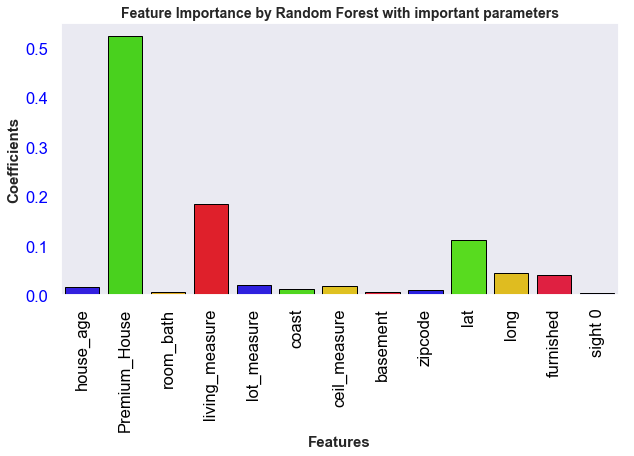

In [45]:
from sklearn.ensemble import RandomForestRegressor

heading = "Random Forest with important parameters"

rf = RandomForestRegressor()
rf.fit(train_data_RF,train_label_RF)
Predrf = rf.predict(test_data_RF)

show_features(Random_forest_feature_df,rf.feature_importances_,pd.DataFrame(Predrf),test_label_RF,heading)

### Random Forest Regressor - Hyper Parameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_cv_rf =GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_cv_rf.fit(train_data_RF,train_label_RF)

print(grid_cv_rf.best_estimator_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 40.4min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [48]:
heading = 'Random Forest - After Parameter Tuning'

Predrfr_Tune  = grid_cv_rf.predict(test_data_RF) 
Get_Metrics(pd.DataFrame(Predrfr_Tune),test_label_RF,heading)

Random Forest - After Parameter Tuning
RMSE      : 114279.98
R-Squared : 0.89


### GradientBoostingRegressor

               Features  Coefficients
0             house_age  8.756036e-03
1   age_after_renovtion  3.628464e-03
2         Premium_House  5.428071e-01
3              room_bed  4.412948e-04
4             room_bath  4.741466e-03
5        living_measure  1.915724e-01
6           lot_measure  1.521938e-02
7                  ceil  9.774912e-05
8                 coast  1.833553e-02
9          ceil_measure  7.239488e-03
10             basement  1.543101e-03
11              zipcode  5.493533e-03
12                  lat  1.042234e-01
13                 long  2.165056e-02
14            furnished  4.822979e-02
15              sight 0  7.748268e-03
16              sight 1  0.000000e+00
17              sight 2  0.000000e+00
18              sight 3  6.299537e-07
19              sight 4  1.196689e-03
20          condition 1  6.806332e-05
21          condition 2  2.964273e-05
22          condition 3  7.869773e-04
23          condition 4  4.446934e-04
24          condition 5  7.661676e-04
25          

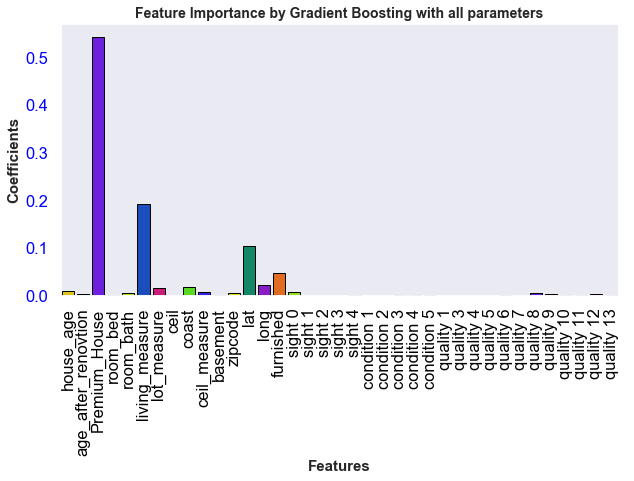

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

heading = "Gradient Boosting with all parameters"

gbr = GradientBoostingRegressor()
gbr.fit(train_data,train_label)
Predgbr = gbr.predict(test_data)

show_features(house_feature_df,gbr.feature_importances_,pd.DataFrame(Predgbr),test_label,heading)

In [52]:
GB_feature_df = house_feature_df

In [53]:
GB_feature_df = GB_feature_df.drop(['age_after_renovtion','room_bed','room_bath','ceil','basement',
                                                          'sight 1' ,'sight 2','sight 3','sight 4',
                                                          'condition 1','condition 2','condition 3','condition 4','condition 5',
                                                          'quality 1','quality 3','quality 4', 'quality 5','quality 6','quality 7',
                                                          'quality 8','quality 9','quality 10','quality 11','quality 12','quality 13'], axis=1)

In [54]:
data_GB,label_GB = GB_feature_df.iloc[:,:-1],GB_feature_df.iloc[:,-1]
train_data_GB, test_data_GB, train_label_GB, test_label_GB = train_test_split(data_GB, label_GB, test_size=0.3, random_state=123)

          Features  Coefficients
0        house_age      0.006701
1    Premium_House      0.549253
2   living_measure      0.200038
3      lot_measure      0.015717
4            coast      0.020365
5     ceil_measure      0.012878
6          zipcode      0.005678
7              lat      0.110779
8             long      0.025593
9        furnished      0.044395
10         sight 0      0.008603

Root Mean squared error : 120053.84
R-Square                : 0.88


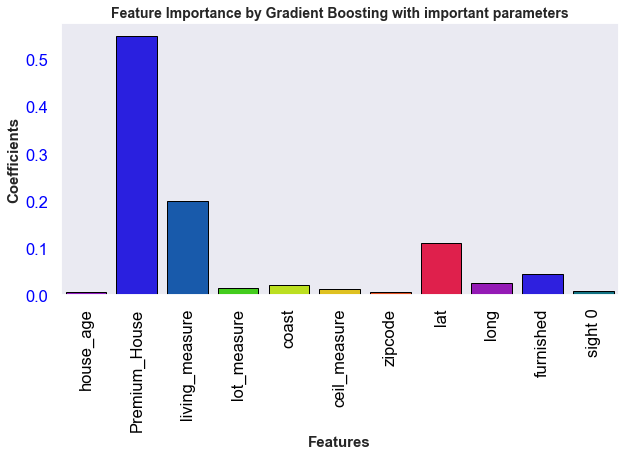

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

heading = "Gradient Boosting with important parameters"

gbr = GradientBoostingRegressor()
gbr.fit(train_data_GB,train_label_GB)
Predgbr = gbr.predict(test_data_GB)

show_features(GB_feature_df,gbr.feature_importances_,pd.DataFrame(Predgbr),test_label_GB,heading)

### Gradient Boosting Regressor - Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'n_estimators': [400],
              'max_depth':[4],
              'min_samples_split': [8, 10],
              'min_samples_leaf':[8,30],  
              'learning_rate':[0.2]}

clf = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2').fit(train_data_GB,train_label_GB)

print(clf.best_estimator_) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [57]:
heading = 'Gradient Boosting - After Parameter Tuning'

Predgbr_Tune = clf.predict(test_data_GB)
Get_Metrics(pd.DataFrame(Predgbr_Tune),test_label_GB,heading)

Gradient Boosting - After Parameter Tuning
RMSE      : 107007.13
R-Squared : 0.90


In [60]:
test_data_GB.dtypes

house_age           int64
Premium_House       int64
living_measure      int64
lot_measure         int64
coast               int64
ceil_measure        int64
zipcode             int64
lat               float64
long              float64
furnished           int64
sight 0             int64
dtype: object

In [58]:
pd.DataFrame({'Model': Model,
              'RMSE': RMSE,
              'R Squared': RSqu})

,Model,RMSE,R Squared
0,Decision Tree with all parameters,155072.450791,0.798227
1,Decision Tree with important features,156057.819946,0.795654
2,Random Forest with all parameters,112947.981894,0.892959
3,Random Forest with important parameters,116126.543504,0.886849
4,Gradient Boosting with all parameters,118992.656575,0.881195
5,Gradient Boosting with important parameters,120053.844991,0.879067


In [59]:
pd.DataFrame({'Model': Model_,
              'RMSE': RMSE_,
              'R Squared': RSqu_})

,Model,RMSE,R Squared
0,Decision Tree - After Parameter Tuning,145357.470951,0.822716
1,Random Forest - After Parameter Tuning,114279.981026,0.890419
2,Gradient Boosting - After Parameter Tuning,107007.130055,0.903923


# Gradient Boosting Regressor - After Tuning the parameters has given high performance of 90% on test data

### Saving Gradient Boosting Model with joblib to use it to make new predictions on the unseen test set

In [61]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

### Model "Gradient Boosting Regressor" was saved which was built with the following features

### In another words, to estimate the cost of the house price on unseen data, user need to input the following values
